# Notebook 1

The CRR model is a useful tool to approximate option prices in the Black-Scholes model. In the code snippet below, we define the variables $r$, $\sigma$, $T$, $K$ and $S(0)$ for the model.

## Initialize parameters and installing libraries

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

r = 0.02
sigma = 0.3
T = 1
K = 100
S0 = 120

<br>

## Step 1: Valuing European options in the CRR model

Our first goal is to implement the pseudocode algorithm given in Section 2.4 of the lecture notes. The algorithm is supposed to compute the price of a European call option with strike $K$ and time to maturity $T$ in the CRR model and volatility $\sigma$. We break down the algorithm in multiple steps. The pseudocode algorithm starts with the following lines:

**Input** $r, \sigma, S(0), T, K, M$ <br>
**Compute** $\Delta t := T/M$ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Set $u, d, q$ according to $(2.4 - 2.7)$. <br>

**Task 1.1**: Apart from $M$, the input values are already defined in the code snippet above. Set $M$ to 50 and compute $\Delta t$ as well as $u$, $d$ and $q$. Store these numbers in variables `delta_t`, `u`, `d` and `q`.

*Useful Python commands*: `np.exp`, `np.sqrt`

In [3]:
# M = 50
# delta_t = 1/50
# beta= (1/2)*(np.exp((-r)*delta_t)+np.exp((r+sigma**2)*delta_t))
# beta

In [4]:
# u = beta+np.sqrt((beta**2)-1)
# u

In [5]:
# d = beta-np.sqrt((beta**2)-1)
# d

In [6]:
# q = (np.exp(r*delta_t)-d)/(u-d)
# q

## Option Valuation Using Binomial Tree/CRR Model 

## Calculating Parameters 

In [7]:
M = 50
delta_t = 1/M
beta= (1/2)*(np.exp((-r)*delta_t)+np.exp((r+sigma**2)*delta_t))
u = beta+np.sqrt((beta**2)-1)
d = beta-np.sqrt((beta**2)-1)
q = (np.exp(r*delta_t)-d)/(u-d)

The algorithm continues as follows:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Set $S_{00} := S(0)$. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $S_{ji} := S_{00} u^jd^{i-j}$ for $i = 1, \dots, M$ and $j = 0, \dots, i$.

The goal is to compute the stock price matrix $S \in \mathbb{R}^{(M + 1) \times (M + 1)}$ in the CRR model with initial price $S(0) > 0$.

**Task 1.2**: Initialize `S` as an array containing zeros. Use two nested for-loops to fill `S` with the correct values.

*Useful Python commands*: `np.zeros`

In [8]:
#help(np.zeros)

## Initialize the dimenssion and array S for stocks

In [9]:
#dim=(51,51)
dim=((M+1),(M+1))
S = np.zeros(dim)
S[0][0]=S0

In [10]:
S

array([[120.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], shape=(51, 51))

In [11]:
for i in range(1,(M+1)):
    for j in range(0,(i+1)):
        S[j][i]=S0*(u**j)*(d**(i-j))

In [12]:
S

array([[ 120.        ,  115.01229671,  110.23190328, ...,   15.63891743,
          14.98889843,   14.36589695],
       [   0.        ,  125.2040035 ,  120.        , ...,   17.02474543,
          16.31712561,   15.63891743],
       [   0.        ,    0.        ,  130.63368745, ...,   18.53337728,
          17.76305239,   17.02474543],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  920.77984686,
         882.50837458,  845.8276252 ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
         960.71102645,  920.77984686],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        , 1002.37388935]], shape=(51, 51))

The algorithm finishes with

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $V_{jM}$ according to $(2.16)$. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **for** $i = 1, \dots, M$ and $j = 0, \dots, i$: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $V_{ji}$ according to (2.14). <br>
**Output** $V_{00}$

**Task 1.3**: Initialize the option price matrix $V \in \mathbb{R}^{(M + 1) \times (M + 1)}$ as an array `V`. Use the terminal condition of the call option to fill the final column of `V` and then use a for-loop to fill the array backwards in time.

*Useful Python commands*: `np.zeros`, `np.maximum`, `np.exp`

In [13]:
# S[50][50]
# V = np.zeros(dim)
# V[50][50]=np.max(S[50][50]-K)
# V[50][50]

## Important to traverse the array from last to first 

In [14]:
arr = [10, 20, 30, 40, 50]

for i in range(len(arr) - 1, -1, -1):
    print(arr[i])


50
40
30
20
10


## Initialize the option pricing vector and fill the terminal node, internal node by traversing from back to front nodes

In [15]:
V = np.zeros(dim)
V[49][49]

np.float64(0.0)

In [16]:
V[:,M] = np.maximum((S[:,M]-K),0)

In [17]:
V[50][50]

np.float64(902.373889350261)

In [18]:
V = np.zeros(dim)
# for European call option
V[:,M] = np.maximum((S[:,M]-K),0) # check the difference between np.max and np.maximum documentation
for i in range((M-1),-1,-1):
    for j in range(0,(i+1)):
        V[j][i]= (np.exp(-r*delta_t))*(q*(V[j+1][i+1])+(1-q)*(V[j][i+1]))

In [19]:
V

array([[ 26.80219164,  22.80720448,  19.17893514, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  30.91430362,  26.54060456, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  35.41750291, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 820.85981487,
        782.54836658, 745.8276252 ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        860.75101845, 820.77984686],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 902.37388935]], shape=(51, 51))

**Task 1.4**: Write a function `european_CRR(g, S0, T, r, sigma, M)` that performs the whole algorithm from Tasks 1.1 - 1.3 and returns the option price $V(0)$ at time 0. However, instead of pricing a European call option, the function should take an arbitrary payoff function `g` as an argument that computes the terminal payoff $g(S(T))$ as a function of $S(T)$.

#### Task 1.1 to 1.3

## Previous Code

In [20]:
M = 50
delta_t = T/M
beta= (1/2)*(np.exp((-r)*delta_t)+np.exp((r+sigma**2)*delta_t))
u = beta+np.sqrt((beta**2)-1)
d = beta-np.sqrt((beta**2)-1)
q = (np.exp(r*delta_t)-d)/(u-d)
dim=((M+1),(M+1))
S = np.zeros(dim)
S[0][0]=S0
for i in range(1,(M+1)):
    for j in range(0,(i+1)):
        S[j][i]=S0*(u**j)*(d**(i-j))

V = np.zeros(dim)
#for the terminal node european put and call optionand american put and call option price will be same  
V[:,M] = np.maximum((S[:,M]-K),0) # check the difference between np.max and np.maximum documentation
for i in range((M-1),-1,-1):
    for j in range(0,(i+1)):
        V[j][i]= (np.exp(-r*delta_t))*(q*(V[j+1][i+1])+(1-q)*(V[j][i+1]))

### For Terminal Payoff

In [21]:
def g_call(S):
    #dim=((M+1),(M+1))
    #S = np.zeros(dim)
    K=100
    return np.maximum((S-K),0)

def g_put(S):
    K=100
    return np.maximum(K-S,0)

## European CRR function is created to build CRR model

In [22]:
def european_CRR(g, S0, T, r, sigma, M):
    
    delta_t = T/M
    beta= (1/2)*(np.exp((-r)*delta_t)+np.exp((r+sigma**2)*delta_t))
    u = beta+np.sqrt((beta**2)-1)
    d = beta-np.sqrt((beta**2)-1)
    q = (np.exp(r*delta_t)-d)/(u-d)
    dim=((M+1),(M+1))
    
    S = np.zeros(dim)
    S[0][0]=S0
    for i in range(1,(M+1)):
        for j in range(0,(i+1)):
            S[j][i]=S0*(u**j)*(d**(i-j))
    
    V = np.zeros(dim)
    #for the terminal node european put and call optionand american put and call option price will be same  
    #V[:,M] = np.maximum((S[:,M]-K),0) # check the difference between np.max and np.maximum documentation
    V[:,M] = g(S[:,M])
    for i in range((M-1),-1,-1):
        for j in range(0,(i+1)):
            V[j][i]= (np.exp(-r*delta_t))*(q*(V[j+1][i+1])+(1-q)*(V[j][i+1]))
            
    return V[0][0]

### American CRR Function 

In [24]:
def american_CRR_call(g, S0, T, r, sigma, M):
    
    delta_t = T/M
    beta= (1/2)*(np.exp((-r)*delta_t)+np.exp((r+sigma**2)*delta_t))
    u = beta+np.sqrt((beta**2)-1)
    d = beta-np.sqrt((beta**2)-1)
    q = (np.exp(r*delta_t)-d)/(u-d)
    dim=((M+1),(M+1))
    
    S = np.zeros(dim)
    S[0][0]=S0
    for i in range(1,(M+1)):
        for j in range(0,(i+1)):
            S[j][i]=S0*(u**j)*(d**(i-j))
    
    V = np.zeros(dim)
    #for the terminal node european put and call optionand american put and call option price will be same  
    #V[:,M] = np.maximum((S[:,M]-K),0) # check the difference between np.max and np.maximum documentation
    V[:,M] = g(S[:,M])
    for i in range((M-1),-1,-1):
        for j in range(0,(i+1)):
            V[j][i]= max( np.maximam((S[j][i]-k),0), (np.exp(-r*delta_t))*(q*(V[j+1][i+1])+(1-q)*(V[j][i+1]) ) )
            
    return V[0][0]

## visualization Of Stock and Option price movement

## Stock

<br><br>

## Step 2: Visualizing the content of the stock price and option price matrix.

Now we want to visualize the stock price matrix `S` and the option price matrix `V` in the CRR model a little further. The following code snippet plots all the possible stock prices in the matrix `S` in a common plot. 

**Task 2.1**: Execute the code below and interpret this plot using a comment. Why does it make sense that the discretization of the grid of stock prices becomes much finer for small stock prices and much coarser for very large stock prices? What are possible disadvantages of this fact?

In [25]:
S

array([[ 120.        ,  115.01229671,  110.23190328, ...,   15.63891743,
          14.98889843,   14.36589695],
       [   0.        ,  125.2040035 ,  120.        , ...,   17.02474543,
          16.31712561,   15.63891743],
       [   0.        ,    0.        ,  130.63368745, ...,   18.53337728,
          17.76305239,   17.02474543],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  920.77984686,
         882.50837458,  845.8276252 ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
         960.71102645,  920.77984686],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        , 1002.37388935]], shape=(51, 51))

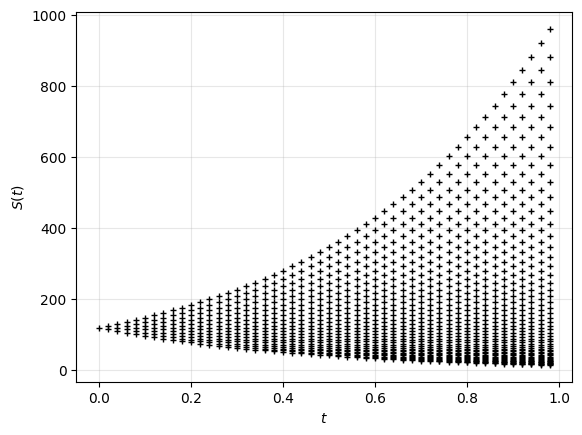

In [26]:
for i in range(M):
    plt.plot(np.repeat(i * delta_t, i + 1), S[:i + 1, i], '+', color='black', markersize=4)
plt.grid(alpha=0.3)
plt.xlabel('$t$')
plt.ylabel('$S(t)$')
plt.show()

# Interpretation: ...

## Interpretation : -----need to understand and prepare your own note

### 1. Why does it make sense that the discretization becomes finer for small stock prices and coarser for large ones?

This makes sense due to relative price changes:

Stock prices are typically modeled using geometric Brownian motion, where price changes are proportional to the current price (lognormal behavior).

A small change in percentage terms for a small price translates to a small absolute change, while the same percentage change for a large price gives a larger absolute change.

In a log scale, stock price changes are more uniform. But in linear scale, this leads to the grid being denser at low prices and spread out at high prices.

So, it's natural that:

The grid is finer (more points) where price is small, because each move is small.

The grid is coarser (fewer points) at high prices, because changes are larger in absolute terms.


### 2. What are possible disadvantages of this fact?
This non-uniform discretization can lead to numerical challenges:

🔹 Accuracy issues for high stock prices: Coarser grid means less precision in representing stock behavior at higher price levels.

🔹 Interpolation errors: If you need values at non-grid points (like in pricing American options), the irregular spacing can make interpolation less accurate.

🔹 Difficulty in calibration: If you're trying to match market data or build hedging strategies, sparse points at high prices could limit model flexibility.

🔹 Bias in expectations: Coarser representation might underrepresent rare but important paths, like those where stock prices surge dramatically.



## Option Price

**Task 2.2**: Copy the above code snippet under Task 2.1 and adapt the code so that it visualizes the option price matrix `V` instead of `S`. What do you observe compared to the output of Task 2.1? Interpret your plot using a comment.

In [27]:
V

array([[ 26.80219164,  22.80720448,  19.17893514, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  30.91430362,  26.54060456, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  35.41750291, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 820.85981487,
        782.54836658, 745.8276252 ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        860.75101845, 820.77984686],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 902.37388935]], shape=(51, 51))

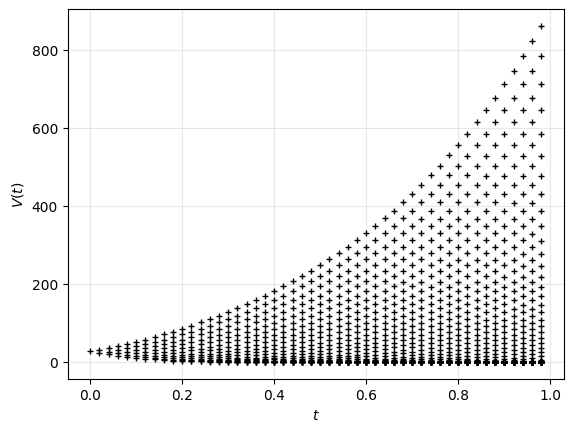

In [28]:
for i in range(M):
    plt.plot(np.repeat(i * delta_t, i + 1), V[:i + 1, i], '+', color='black', markersize=4)
plt.grid(alpha=0.3)
plt.xlabel('$t$')
plt.ylabel('$V(t)$')
plt.show()

# Interpretation: ...

## Interpretation:

For the small stock prices the probability of getting good value of the option which contain those underlyings of quite low stock prices is also quite low.  Similarly those stock's prices are quite higher, the price of the options of those corresponding stock prices are also quite high. That's why the shape of the stock price and option price diagram is more or less same. It can clearly be seen that the prices of call options and of the underlying stock are highly correlated in the CRR model. Compared to the stock price matrix `S`, the binomial tree for `V` becomes even more compressed for low stock prices at the bottom since for these low stock prices it becomes increasingly unlikely that the option finishes in the money.

## Visualization Of Simulated Stock Price and Option Price Path

We now want to visualize one specific realization of a stock price path in the CRR model as well as the corresponding realisation of the option price path. Suppose that the empirical probability of an upwards movement in the CRR model is given by $p = 0.5$.

**Task 2.3**: Fill the blank spaces (marked by `...`) in the code snippet below: First, set the numpy random seed to 24. Then, use the function `np.random.binomial` to draw $M$ samples of a Bernoulli distribution with parameter $p = 0.5$ and store these draws in an array `coin_flips`. The code snippet then continues to visualize the simulated stock price path and the simulated option price path that correspond to your randomly drawn coin flips for the up and down movements.

*Useful Python commands*: `np.random.seed`

In [29]:
#help(np.random.binomial)

In [30]:
S

array([[ 120.        ,  115.01229671,  110.23190328, ...,   15.63891743,
          14.98889843,   14.36589695],
       [   0.        ,  125.2040035 ,  120.        , ...,   17.02474543,
          16.31712561,   15.63891743],
       [   0.        ,    0.        ,  130.63368745, ...,   18.53337728,
          17.76305239,   17.02474543],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  920.77984686,
         882.50837458,  845.8276252 ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
         960.71102645,  920.77984686],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        , 1002.37388935]], shape=(51, 51))

In [31]:
V

array([[ 26.80219164,  22.80720448,  19.17893514, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  30.91430362,  26.54060456, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  35.41750291, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 820.85981487,
        782.54836658, 745.8276252 ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        860.75101845, 820.77984686],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 902.37388935]], shape=(51, 51))

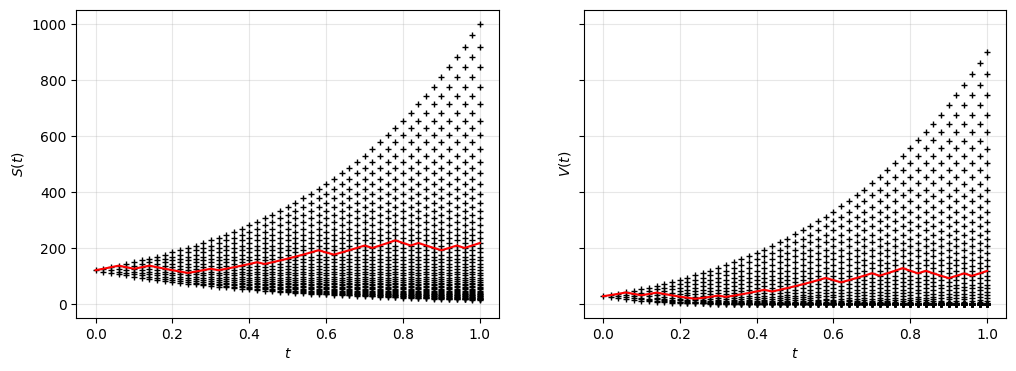

In [32]:
np.random.seed(24)
p=0.5
n=1 # number of trial, here we are trying to toss the coin only one time 
coin_flips = np.random.binomial(n,p,M) #M is taken as size that is number of samples that means we are trying to simulate our samples upto M times so, M is the number of simulation
binomial_path = coin_flips.cumsum() # we are trying to sum up to get the path 
binomial_path = np.append(0, binomial_path) # this is the path

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
for i in range(M + 1):
    ax[0].plot(np.repeat(i * delta_t, i + 1), S[:i + 1, i], '+', color='black', markersize=4)
    ax[1].plot(np.repeat(i * delta_t, i + 1), V[:i + 1, i], '+', color='black', markersize=4)
ax[0].grid(alpha=0.3)
ax[1].grid(alpha=0.3)
ax[0].set_xlabel('$t$')
ax[1].set_xlabel('$t$')
ax[0].set_ylabel('$S(t)$')
ax[1].set_ylabel('$V(t)$')
ax[0].plot(np.linspace(0, 1, M + 1), S[binomial_path, np.arange(M + 1)], color='red')
ax[1].plot(np.linspace(0, 1, M + 1), V[binomial_path, np.arange(M + 1)], color='red')
plt.show()

## Interpretation :

path of stocks and options ask the difference of the shape of the path
 

<br><br>

## Step 3: Examining no-arbitrage bounds and the put-call parity

By standard no-arbitrage arguments, the price $V_{\mathrm{call}}(0)$ of a European call option with strike $K$ lies inside the bounds $S(0) - K e^{-rT} \leq V_{\mathrm{call}}(0) \leq S(0)$ in any model. Likewise, the price $V_{\mathrm{put}}(0)$ of a European put option with strike $K$ lies inside the bounds $0 \leq V_{\mathrm{put}}(0) \leq K e^{-rT}$ in any model. We now want to examine how the call and put option prices behave with respect to these bounds when the volatility $\sigma$ of the CRR model is varied.

**Task 3.1**: Define an array `sigmas` that contains 500 equally spaced values of $\sigma$ between 0.01 and 5. Then, define two functions `g_call(S)` and `g_put(S)` that compute the payoff of a call option with strike $K = 100$ and the payoff of a put option with strike $K = 100$, respectively, as a function of $S(T)$.

*Useful Python commands*: `np.linspace`, `np.maximum`

## To calculate payoff of  call and put options two functions are created as a function of S(T) with strike price K 

In [31]:
# own note,  (S[j][i]−K)+=max(S[j][i]−K,0) --- for call option
# own note, (k-S[j][i])+=max(k-S[j][i],0) ---- for put option

In [34]:
sigmas = np.linspace(0.01,5,500)

def g_call(S):
    #dim=((M+1),(M+1))
    #S = np.zeros(dim)
    K=100
    return np.maximum((S-K),0)

def g_put(S):
    K=100
    return np.maximum(K-S,0)
    

In [33]:
#sigmas = np.linspace(0.01,5,500)

In [34]:
#S

**Task 3.2**: Define an array `call_prices_CRR` of length 500 and an array `put_prices_CRR` of length 500 and use a for-loop and your function `european_CRR` to fill these with the call and put prices in the CRR model with $M=100$ with the volatility $\sigma$ taking values in the array `sigmas` and all other input variables as before.

In [45]:
M=100
call_prices_CRR = np.zeros_like(sigmas) #check help(np.zeros_like)
put_prices_CRR = np.zeros_like(sigmas)

for l, sigma in enumerate(sigmas):
    call_prices_CRR[l] = european_CRR(g_call, S0, T, r, sigma, M)
    put_prices_CRR[l] = european_CRR(g_put, S0, T, r, sigma, M)



In [46]:
call_prices_CRR[490:499]

array([118.89466879, 118.91267291, 118.93042431, 118.94792587,
       118.96518042, 118.9821908 , 118.99895979, 119.01549018,
       119.03178471])

In [47]:
put_prices_CRR[490:499]

array([96.91453612, 96.93254024, 96.95029164, 96.9677932 , 96.98504775,
       97.00205813, 97.01882712, 97.03535751, 97.05165204])

### Similary for American put and call option

In [48]:
def american_CRR_call(g, S0, T, r, sigma, M):
    
    delta_t = T/M
    beta= (1/2)*(np.exp((-r)*delta_t)+np.exp((r+sigma**2)*delta_t))
    u = beta+np.sqrt((beta**2)-1)
    d = beta-np.sqrt((beta**2)-1)
    q = (np.exp(r*delta_t)-d)/(u-d)
    dim=((M+1),(M+1))
    
    S = np.zeros(dim)
    S[0][0]=S0
    for i in range(1,(M+1)):
        for j in range(0,(i+1)):
            S[j][i]=S0*(u**j)*(d**(i-j))
    
    V = np.zeros(dim)
    #for the terminal node european put and call optionand american put and call option price will be same  
    #V[:,M] = np.maximum((S[:,M]-K),0) # check the difference between np.max and np.maximum documentation
    V[:,M] = g(S[:,M])
    for i in range((M-1),-1,-1):
        for j in range(0,(i+1)):
            V[j][i]= max( np.maximum((S[j][i]-K),0), (np.exp(-r*delta_t))*(q*(V[j+1][i+1])+(1-q)*(V[j][i+1]) ) )
            
    return V[0][0]

In [49]:
M=100
call_prices_American_CRR = np.zeros_like(sigmas) #check help(np.zeros_like)
put_prices_American_CRR = np.zeros_like(sigmas)

for l, sigma in enumerate(sigmas):
    call_prices_American_CRR[l] = american_CRR_call(g_call, S0, T, r, sigma, M)
    #put_prices_CRR[l] = european_CRR(g_put, S0, T, r, sigma, M)



In [51]:
call_prices_American_CRR[490:499]

array([118.89466879, 118.91267291, 118.93042431, 118.94792587,
       118.96518042, 118.9821908 , 118.99895979, 119.01549018,
       119.03178471])

**Task 3.3**: Plot the call prices from the array `call_prices_CRR` against the values of $\sigma$ stored in the array `sigmas`. Use the function `plt.axhline` to draw horizontal lines at the height of the no-arbitrage lower bound $S(0) - K e^{-rT}$ and the upper bound $S(0)$.

In [52]:
#help(plt.axhline)

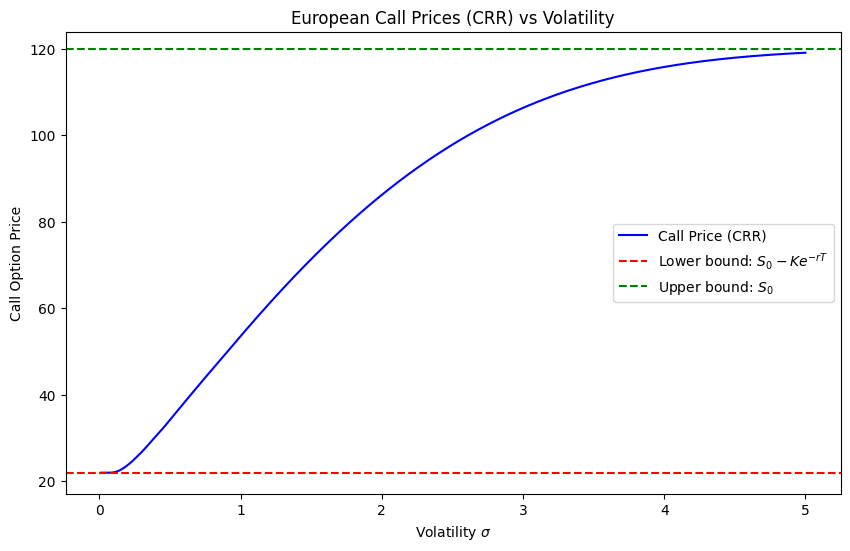

In [53]:
# axhline(y=.5, xmin=0.25, xmax=0.75)

# No-arbitrage bounds for a European call --- is the 'no-arbitrage means complete market?'
lower_bound = S0 - K * np.exp(-r * T)
upper_bound = S0

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sigmas, call_prices_CRR, label='Call Price (CRR)', color='blue')
plt.axhline(y=lower_bound, color='red', linestyle='--', label=r'Lower bound: $S_0 - K e^{-rT}$')
plt.axhline(y=upper_bound, color='green', linestyle='--', label=r'Upper bound: $S_0$')

plt.title('European Call Prices (CRR) vs Volatility')
plt.xlabel(r'Volatility $\sigma$')
plt.ylabel('Call Option Price')
plt.legend()
#plt.grid(True, alpha=0.3)
plt.show()

## Interpretation : Ask

In [ ]:
# axhline(y=.5, xmin=0.25, xmax=0.75)

# No-arbitrage bounds for a European call --- is the 'no-arbitrage means complete market?'
lower_bound = S0 - K * np.exp(-r * T)
upper_bound = S0

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sigmas, call_prices_CRR, label='Call Price (CRR)', color='blue')
plt.axhline(y=lower_bound, color='red', linestyle='--', label=r'Lower bound: $S_0 - K e^{-rT}$')
plt.axhline(y=upper_bound, color='green', linestyle='--', label=r'Upper bound: $S_0$')

plt.title('European Call Prices (CRR) vs Volatility')
plt.xlabel(r'Volatility $\sigma$')
plt.ylabel('Call Option Price')
plt.legend()
#plt.grid(True, alpha=0.3)
plt.show()

**Task 3.4**: Plot the put prices from the array `put_prices_CRR` against the values of $\sigma$ stored in the array `sigmas`. Use the function `plt.axhline` to draw horizontal lines at the height of the no-arbitrage lower bound $0$ and the upper bound $K e^{-rT}$. Interpret your plots from Task 3.3 and Task 3.4 in a comment.

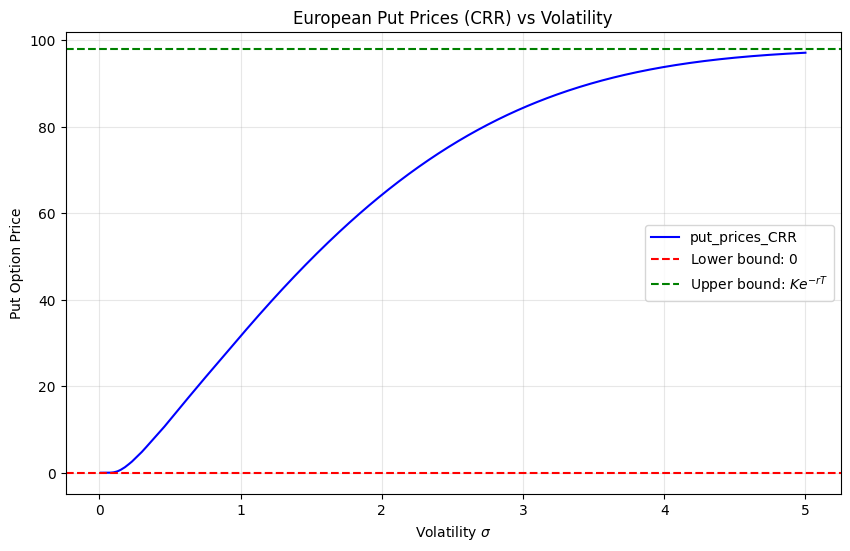

In [54]:
# axhline(y=.5, xmin=0.25, xmax=0.75)

# No-arbitrage bounds for a European call
lower_bound = 0
upper_bound= K * np.exp(-r * T)
#upper_bound = S0

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sigmas, put_prices_CRR, label='put_prices_CRR', color='blue')
plt.axhline(y=lower_bound, color='red', linestyle='--', label=r'Lower bound: $0$')
plt.axhline(y=upper_bound, color='green', linestyle='--', label=r'Upper bound: $K e^{-rT}$')

plt.title('European Put Prices (CRR) vs Volatility')
plt.xlabel(r'Volatility $\sigma$')
plt.ylabel('Put Option Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Interpretation: ...

## Interpretation :

Even though call and put prices often behave opposite of each other, e.g. when plotted against the initial stock price $S(0)$ or against the strike price $K$, this is not the case when plotted against volatility $\sigma$. Both call and put prices increase with a higher value of $\sigma$ and decrease with a lower value of $\sigma$, exhausting the whole no-arbitrage ranges given by the dashed lines. The reason for that is that a higher value of $\sigma$ *symmetrically* increases both the probability of very high and very low stock prices $S(T)$ and hence both the probability of call and of put options to expire in the money.

<br>

The *put-call parity* relationship states that $V_{\mathrm{put}}(t) = K e^{-r(T - t)} - S(0) + V_{\mathrm{call}}(t)$ holds for any $t \in [0, T]$ and in any model.

**Task 3.5**: Verify that the put-call parity holds by plotting the difference of the left-hand side and the right-hand side in the above equation against the values of $\sigma$ stored in the array `sigmas` by using the call and put values stored in the arrays `call_prices_CRR` and `put_prices_CRR`.

In [55]:
# for i in range(M+1):
#     difference_call_put_prices[i]=(call_prices_CRR[i]-put_prices_CRR[i])-(K*(np.exp((-r)*T)))+S0
# #difference_call_put_prices

In [56]:
difference_call_put_prices = put_prices_CRR -call_prices_CRR - K * np.exp(-r*T) + S0

In [57]:
#put_prices_CRR

In [58]:
#difference_call_put_prices

In [59]:
#sigmas

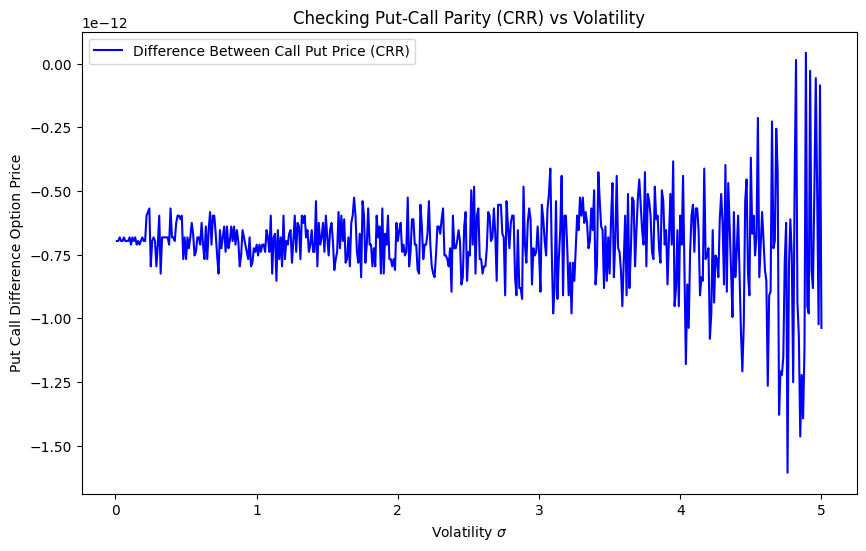

In [60]:
# axhline(y=.5, xmin=0.25, xmax=0.75)

# No-arbitrage bounds for a European call
#lower_bound = S0 - K * np.exp(-r * T)
#upper_bound = S0

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sigmas, difference_call_put_prices, label='Difference Between Call Put Price (CRR)', color='blue')
#plt.axhline(y=lower_bound, color='red', linestyle='--', label=r'Lower bound: $S_0 - K e^{-rT}$')
#plt.axhline(y=upper_bound, color='green', linestyle='--', label=r'Upper bound: $S_0$')

plt.title('Checking Put-Call Parity (CRR) vs Volatility')
plt.xlabel(r'Volatility $\sigma$')
plt.ylabel('Put Call Difference Option Price')
plt.legend()
#plt.grid(True, alpha=0.3)
plt.show()

<br><br>

## Step 4: Valuation of Down-and-out call options in the CRR model

Valuing path-dependent exotic options in the CRR model is not always straightforward because in general, the recombining structure of the tree cannot be used when dealing with path-dependencies. An exception to this are Barrier options like *Down-and-out call options* that we will deal with below. A Down-and-out call option has the payoff $V(T) = 1_{\{S(t_i) \geq B \text{ for any } i = 0, \dots, M\}} (S(T) - K)^+$ at the terminal time $T$, i.e. it pays out the payoff of a European put option as long as the stock price never fell below a pre-defined barrier $B$ at any time before, in which case the options pays out nothing. The following pseudo code summarizes the computation of Down-and-out call options in the CRR model:

**Input** $r, \sigma, S(0), T, K, B, M$ <br>
**Compute** $\Delta t := T/M$ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Set $u, d, q$ according to $(2.4 - 2.7)$. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Set $S_{00} := S(0)$. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $S_{ji} := S_{00} u^jd^{i-j}$ for $i = 1, \dots, M$ and $j = 0, \dots, i$. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $V_{jM}$ according to $(2.16)$. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **for** $i = 1, \dots, M$ and $j = 0, \dots, i$: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $V_{ji}$ according to (2.14). <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $V_{ji} = 0$ if $S_{ji} < B$. <br>
**Output** $V_{00}$

**Task 4.1**: Modify your function `european_CRR` from Task 1.4 and define a new function `down_and_out_call_CRR(S0, K, T, B, r, sigma, M)` that implements the above pseudo code and returns the initial price of a Down-and-out call option with barrier $B$ and strike $K$.

In [61]:
def down_and_out_call_CRR(S0, K, T, B, r, sigma, M):
    
    delta_t = T/M
    beta= (1/2)*(np.exp((-r)*delta_t)+np.exp((r+sigma**2)*delta_t))
    u = beta+np.sqrt((beta**2)-1)
    d = beta-np.sqrt((beta**2)-1)
    q = (np.exp(r*delta_t)-d)/(u-d)
    dim=((M+1),(M+1))
    
    S = np.zeros(dim)
    V = np.zeros(dim)
    S[0][0]=S0
    for i in range(1,(M+1)):
        for j in range(0,(i+1)):
            S[j][i]=S0*(u**j)*(d**(i-j))
            

    #V = np.zeros(dim)
    
    # Terminal payoff for down-and-out call option

    # for j in range(M+1):
    #     if (S[j][M] >= B):
    #         V[j][M] = max((S[j][M] - K), 0)
    #     else:
    #         V[j][M] = 0
    V[:,M] = np.maximum((S[:,M]-K),0) # check the difference between np.max and np.maximum documentation


    # backward induction
    for i in range((M-1),-1,-1):
        for j in range(0,(i+1)):
            V[j][i]= (np.exp(-r*delta_t))*(q*(V[j+1][i+1])+(1-q)*(V[j][i+1]))
            
            if (S[j][i]<float(B)):
                V[j][i]=0
            #else:
            #    V[j][i]= (np.exp(-r*delta_t))*(q*(V[j+1][i+1])+(1-q)*(V[j][i+1]))
    
    return V[0][0]

Now, we want to visualize the sensitivity of the down-and-out call option prices in the CRR model with respect to the value $B$ of the barrier. 

**Task 4.2**: Define an array `B_values` that contains 100 equally spaced values of $B$ between 50 and 150. Then, use a for-loop and your function `down_and_out_call_CRR` from Task 4.1 to compute the barrier option values in the CRR model with $M = 500$ for $B$ taking values in the array `B_values` and all other input variables as before. Store these option prices in an array `barrier_prices_CRR`.

*Useful Python commands*: `np.linspace`

In [62]:
B_values = np.linspace(50,150,100)
B_values[:20]

array([50.        , 51.01010101, 52.02020202, 53.03030303, 54.04040404,
       55.05050505, 56.06060606, 57.07070707, 58.08080808, 59.09090909,
       60.1010101 , 61.11111111, 62.12121212, 63.13131313, 64.14141414,
       65.15151515, 66.16161616, 67.17171717, 68.18181818, 69.19191919])

In [63]:
%%time
B_values = np.linspace(50,150,100)
M=500

r = 0.02
sigma = 0.3
T = 1
K = 100
S0 = 120

barrier_prices_CRR = np.zeros_like(B_values)

for l, B in enumerate(B_values):
    barrier_prices_CRR[l]= down_and_out_call_CRR(S0, K, T, B, r, sigma, M)


CPU times: user 27.2 s, sys: 16.9 ms, total: 27.2 s
Wall time: 27.3 s


In [64]:
barrier_prices_CRR[:40]

array([26.80510176, 26.80510126, 26.80510075, 26.80509864, 26.8050966 ,
       26.80509339, 26.8050807 , 26.80506892, 26.80505104, 26.80498386,
       26.8049242 , 26.80483645, 26.80470839, 26.8042566 , 26.80387687,
       26.80333974, 26.8025858 , 26.80153565, 26.80008411, 26.79809299,
       26.7917203 , 26.7868097 , 26.78027427, 26.77164112, 26.76032139,
       26.74558843, 26.72655362, 26.70214016, 26.67105519, 26.63176069,
       26.58244412, 26.58244412, 26.52098945, 26.44494982, 26.35152306,
       26.23753141, 26.09940686, 25.93318366, 25.73449926, 25.49860511])

**Task 4.3**: Plot the Down-and-out call option prices stored in the array `barrier_prices_CRR` against the values of $B$ stored in the array `B_values`. Interpret your result using a comment. What does the barrier option price converge to when the barrier $B$ becomes very small or very large? What would happen to the plot if you let $M$ go to infinity?

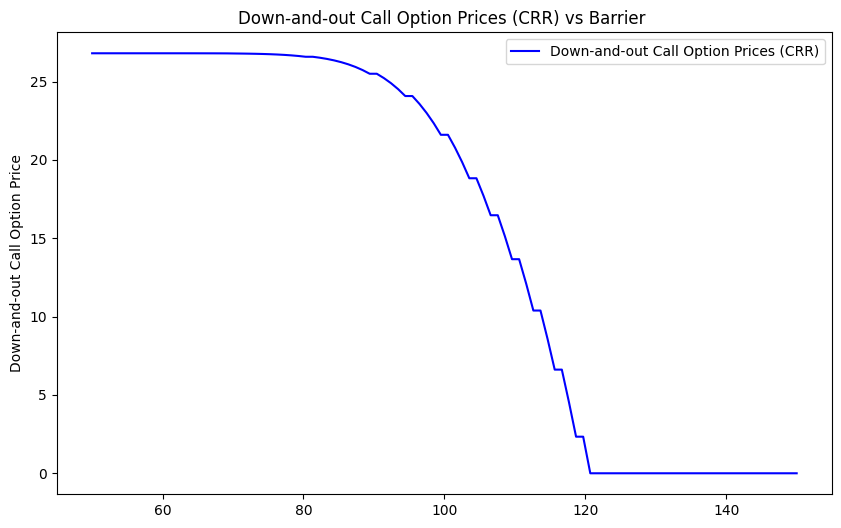

In [65]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(B_values, barrier_prices_CRR, label='Down-and-out Call Option Prices (CRR)', color='blue')


plt.title('Down-and-out Call Option Prices (CRR) vs Barrier ')
#plt.xlabel(r'Barrier $\B$')
plt.ylabel('Down-and-out Call Option Price')
plt.legend()
#plt.grid(True, alpha=0.3)
plt.show()

# Interpretation: ...

## For American Option